In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
books = pd.read_csv('./Dataset/Books.csv')
users = pd.read_csv('./Dataset/Users.csv')
ratings = pd.read_csv('./Dataset/Ratings.csv')

/var/folders/8n/sg6bjbtd2p1g0ktmq_88dsj80000gn/T/ipykernel_18892/4168051057.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('./Dataset/Books.csv')


In [5]:
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [9]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [11]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [12]:
print(books.duplicated().sum())
print(users.duplicated().sum())
print(ratings.duplicated().sum())

0
0
0


EDA for Popularity based recommender system 

In [13]:
books_with_ratings = ratings.merge(books, on = "ISBN")

In [14]:
books_with_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [15]:
books_with_ratings.nunique()

User-ID                 92106
ISBN                   270151
Book-Rating                11
Book-Title             241071
Book-Author            101588
Year-Of-Publication       202
Publisher               16729
Image-URL-S            269842
Image-URL-M            269842
Image-URL-L            269839
dtype: int64

In [16]:
books_with_ratings["Book-Rating"].value_counts()

0     647294
8      91804
10     71225
7      66402
9      60778
5      45355
6      31687
4       7617
3       5118
2       2375
1       1481
Name: Book-Rating, dtype: int64

In [17]:
books_with_ratings["ISBN"].value_counts()

0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
              ... 
0739431536       1
072324801X       1
1401300006       1
1568659830       1
0806917695       1
Name: ISBN, Length: 270151, dtype: int64

<BarContainer object of 11 artists>

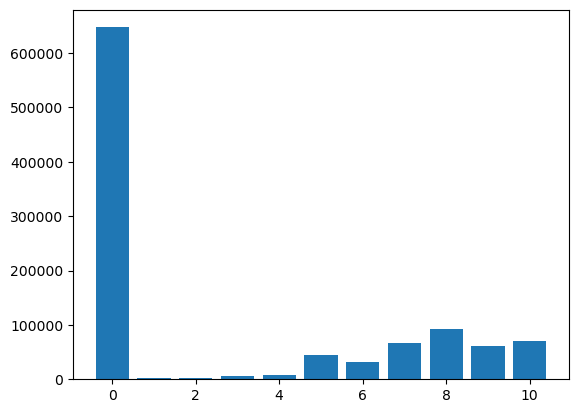

In [18]:
##plot for count of book rating
plt.bar(height = books_with_ratings["Book-Rating"].value_counts().values, x = books_with_ratings["Book-Rating"].value_counts().index)

<BarContainer object of 5 artists>

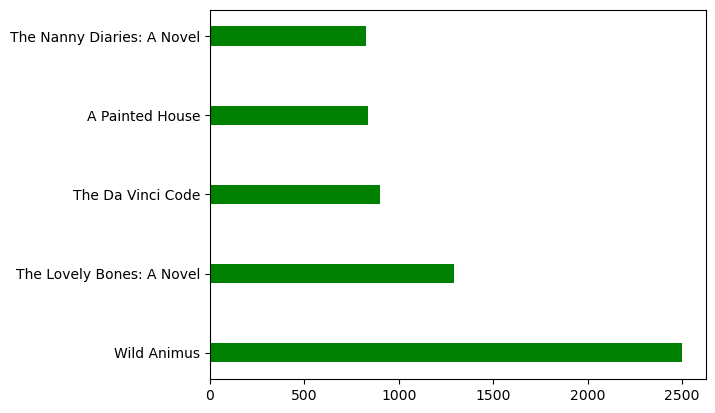

In [19]:
##most read books with ratings
plt.barh(books_with_ratings["Book-Title"].value_counts().head(5).index, books_with_ratings["Book-Title"].value_counts().head().values, color = "green", height = 0.25)

<BarContainer object of 5 artists>

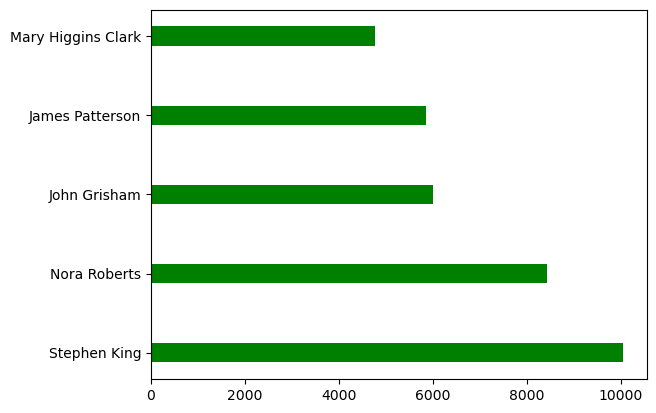

In [20]:
##most read authors with ratings
plt.barh(books_with_ratings["Book-Author"].value_counts().head(5).index, books_with_ratings["Book-Author"].value_counts().head().values, color = "green", height = 0.25)

In [21]:
num_rating_df = books_with_ratings.groupby('Book-Title')['Book-Rating'].count().reset_index()
num_rating_df.rename(columns = {'Book-Rating': 'Number of Ratings'}, inplace = True)
num_rating_df.head()

,Book-Title,Number of Ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [22]:
avg_rating_df = books_with_ratings.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns = {'Book-Rating': 'Average Rating'}, inplace = True)
avg_rating_df.head()

,Book-Title,Average Rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


In [23]:
popular_df = num_rating_df.merge(avg_rating_df, on = "Book-Title")
popular_df

,Book-Title,Number of Ratings,Average Rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [24]:
popular_df = popular_df[popular_df["Number of Ratings"]>200]

In [25]:
popular_df.sort_values("Average Rating",ascending = False, inplace = True)
popular_df

/var/folders/8n/sg6bjbtd2p1g0ktmq_88dsj80000gn/T/ipykernel_18892/938113728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_df.sort_values("Average Rating",ascending = False, inplace = True)


,Book-Title,Number of Ratings,Average Rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
60582,Ender's Game (Ender Wiggins Saga (Paperback)),249,5.409639
...,...,...,...
27600,Breathing Lessons,239,2.117155
94382,Isle of Dogs,288,2.000000
162153,Slow Waltz in Cedar Bend,248,1.895161
163913,Songs in Ordinary Time (Oprah's Book Club (Pap...,232,1.857759


<BarContainer object of 10 artists>

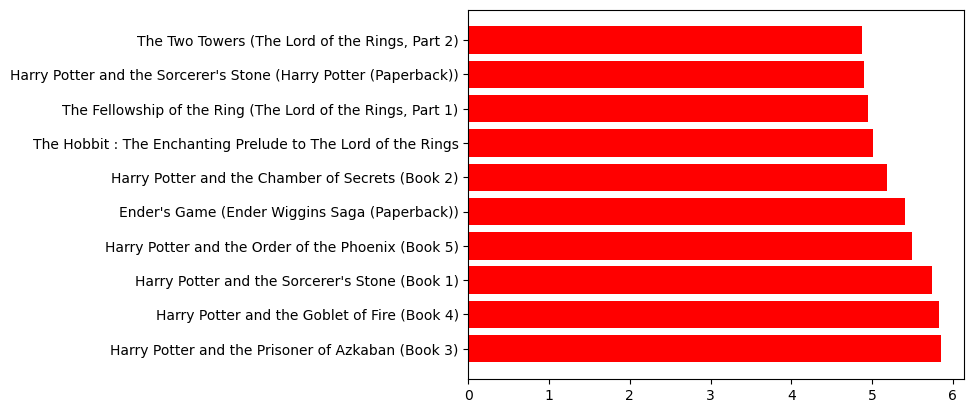

In [26]:
plt.barh(popular_df["Book-Title"].head(10),popular_df["Average Rating"].head(10), color = "red")

In [27]:
popular_df = popular_df.head(50)

In [28]:
popular_df = popular_df.merge(books, on = "Book-Title").drop_duplicates('Book-Title')[['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Number of Ratings', 'Image-URL-M', 'Average Rating']]

In [29]:
popular_df = popular_df.round(1)

Collaborative Filtering Based Recommender System


In [30]:
users_with_more_ratings = books_with_ratings.groupby("User-ID")["Book-Rating"].count()>200
valid_users = users_with_more_ratings[users_with_more_ratings].index

In [31]:
user_based_filtering = books_with_ratings[books_with_ratings['User-ID'].isin(valid_users)]

In [32]:
user_based_filtering

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1030883,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...
1030884,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...
1030885,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...
1030886,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...


In [33]:
books_with_more_ratings = user_based_filtering.groupby('Book-Title')['Book-Rating'].count()>=50

In [34]:
famous_books = books_with_more_ratings[books_with_more_ratings].index

In [35]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [36]:
book_based_filtering = user_based_filtering[user_based_filtering['Book-Title'].isin(famous_books)]
book_based_filtering

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


In [37]:
final_ratings = book_based_filtering

In [38]:
pt = final_ratings.pivot_table(values='Book-Rating', columns='User-ID', index='Book-Title', fill_value=0)

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_score = cosine_similarity(pt)
similarity_score.shape

(706, 706)

In [44]:
def recommend(book_name):
    index = np.where(pt.index == book_name)[0][0]
    similar_books = sorted(list(enumerate(similarity_score[index])), key = lambda x:x[1], reverse = True)[1:6]
    

    data = []
    for i in similar_books:
        print(pt.index[i[0]])
        item = []
        temp_df = books[books["Book-Title"] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates("Book-Title")["Book-Title"].values))
        item.extend(list(temp_df.drop_duplicates("Book-Title")["Book-Author"].values))
        item.extend(list(temp_df.drop_duplicates("Book-Title")["Year-Of-Publication"].values))
        item.extend(list(temp_df.drop_duplicates("Book-Title")["Image-URL-M"].values))
        data.append(item)
        
    return data



In [45]:
recommend('Message in a Bottle')

Nights in Rodanthe
The Mulberry Tree
A Walk to Remember
River's End
Nightmares &amp; Dreamscapes


[['Nights in Rodanthe',
  'Nicholas Sparks',
  2002,
  'http://images.amazon.com/images/P/0446531332.01.MZZZZZZZ.jpg'],
 ['The Mulberry Tree',
  'Jude Deveraux',
  2003,
  'http://images.amazon.com/images/P/0743437640.01.MZZZZZZZ.jpg'],
 ['A Walk to Remember',
  'Nicholas Sparks',
  2000,
  'http://images.amazon.com/images/P/0446608955.01.MZZZZZZZ.jpg'],
 ["River's End",
  'Nora Roberts',
  2003,
  'http://images.amazon.com/images/P/0515127833.01.MZZZZZZZ.jpg'],
 ['Nightmares &amp; Dreamscapes',
  'Stephen King',
  2004,
  'http://images.amazon.com/images/P/0451180232.01.MZZZZZZZ.jpg']]

In [42]:
popular_df

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Number of Ratings,Image-URL-M,Average Rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,Scholastic,428,http://images.amazon.com/images/P/0439136350.0...,5.9
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,387,http://images.amazon.com/images/P/0439139597.0...,5.8
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,Scholastic,278,http://images.amazon.com/images/P/0590353403.0...,5.7
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,347,http://images.amazon.com/images/P/043935806X.0...,5.5
13,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1992,Tor Books,249,http://images.amazon.com/images/P/0312853238.0...,5.4
17,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic,556,http://images.amazon.com/images/P/0439064872.0...,5.2
20,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,1986,Del Rey,281,http://images.amazon.com/images/P/0345339681.0...,5.0
21,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,1986,Del Rey,368,http://images.amazon.com/images/P/0345339703.0...,4.9
30,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,575,http://images.amazon.com/images/P/059035342X.0...,4.9
32,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,1986,Del Rey,260,http://images.amazon.com/images/P/0345339711.0...,4.9


In [43]:
import pickle
pickle.dump(popular_df, open('popular.pkl', 'wb'))

In [46]:
pickle.dump(books, open('books.pkl', 'wb'))
pickle.dump(pt, open('pt.pkl', 'wb'))
pickle.dump(similarity_score, open('similarity_score.pkl', 'wb'))